
# K-Means for Image Clustering

**Why use K-Means on images?**
- **Color quantization / compression:** Pixels are points in RGB (or Lab/HSV) space. Grouping them into *k* clusters replaces many similar colors with a few representative centroids, reducing the color palette while preserving visual structure.
- **Segmentation:** Clustering by color/texture groups similar regions (e.g., sky vs. grass). It’s a fast, unsupervised first pass for separating objects or materials.
- **Speed & simplicity:** K-Means is computationally efficient and easy to implement compared to more complex image models.
- **Dimensionality fit:** Images commonly use 3–5 features per pixel (RGB, Lab, etc.), which is a good spot for K-Means.

**Key assumptions / caveats:**
- **Spherical clusters & equal variance:** K-Means prefers roughly spherical clusters of similar size; complex textures or lighting can break this assumption.
- **k must be chosen:** Try the elbow method / silhouette score. Too small k loses detail; too large k overfits noise.
- **Initialization sensitivity:** Different random initializations may lead to different solutions; fix `random_state` for reproducibility or use `n_init`>1.
- **Color space matters:** Perceptual spaces (e.g., CIE Lab) often cluster better than raw RGB.


In [33]:
# Imports: load core libraries for image IO, array manipulation, plotting, and clustering.
# Note: For reproducibility in K-Means, set random_state and increase n_init.
# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

(-0.5, 749.5, 561.5, -0.5)

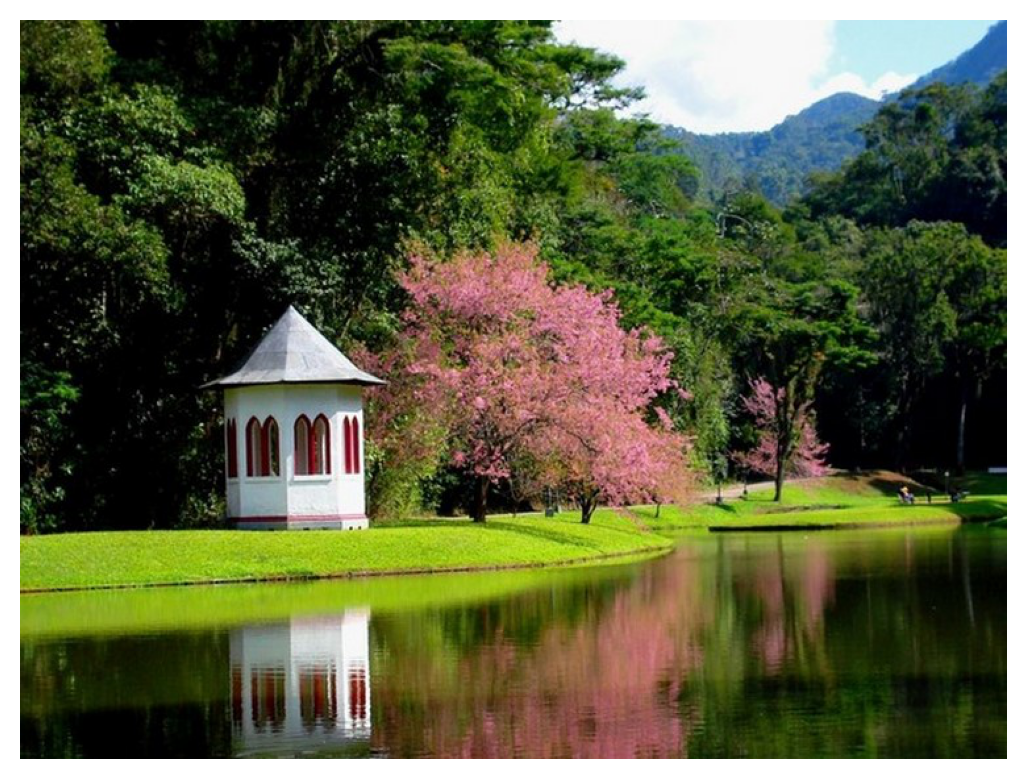

In [34]:
# Visualize results: Compare original image vs. clustered/quantized output.
# Tip: Display multiple ks to see trade-off between detail and compression.
# Step: Load the image into memory.
# Pixels will later be treated as points in color space (e.g., RGB) for clustering.
img = plt.imread('country_image.jpg', format='jpeg')
plt.imshow(img)
plt.axis('off')

In [35]:
img.shape

(562, 750, 3)

(-0.5, 0.5, 0.5, -0.5)

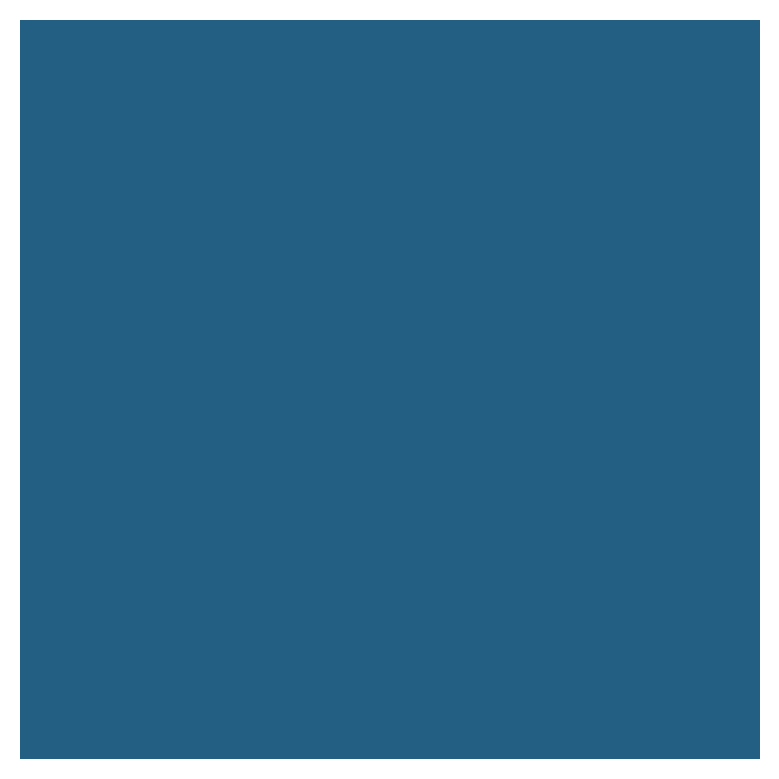

In [36]:
# Assign values for the RGB.  Each value should be between 0 and 255
R = 35
G = 95
B = 131
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off')

In [37]:
# Reshape: Flatten H×W×C image into (H*W)×C matrix.
# Each row is a pixel; each column is a feature (e.g., R,G,B). This is the input to K-Means.
img_flat = img.reshape(-1, 3)
img_flat[:5,:]

array([[51, 58, 17],
       [60, 66, 28],
       [67, 75, 36],
       [71, 81, 44],
       [64, 76, 40]], dtype=uint8)

In [38]:
img_flat.shape

(421500, 3)

In [39]:
# Fit / Predict: Assign each pixel to the nearest centroid in feature space.
# Result: `labels` map every pixel to a cluster ID (0…k-1).
# K-Means: cluster pixels by color (and optionally other features).
# Choose k carefully (elbow, silhouette). Consider `n_init` (e.g., 10–20) and set `random_state` for reproducibility.
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(img_flat)

In [40]:
# Reconstruction: Replace each pixel by its cluster centroid color.
# Effect: Color quantization (reduced palette) or segmentation mask.
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

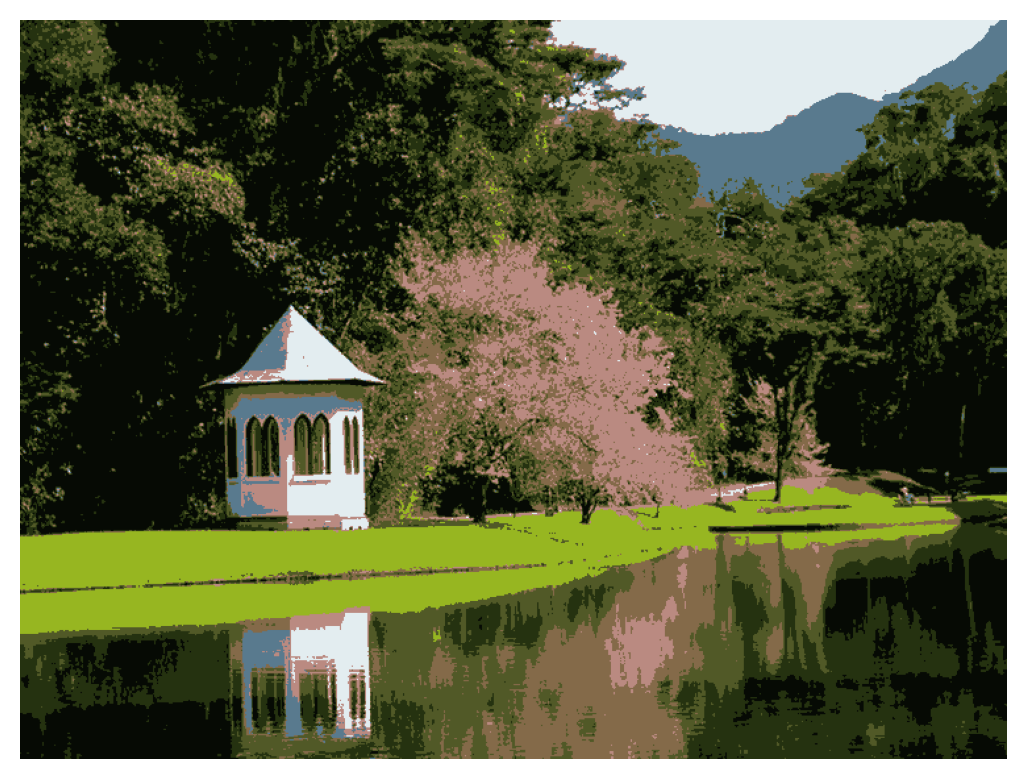

In [41]:
# Visualize results: Compare original image vs. clustered/quantized output.
# Tip: Display multiple ks to see trade-off between detail and compression.
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

In [42]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

In [43]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine) 

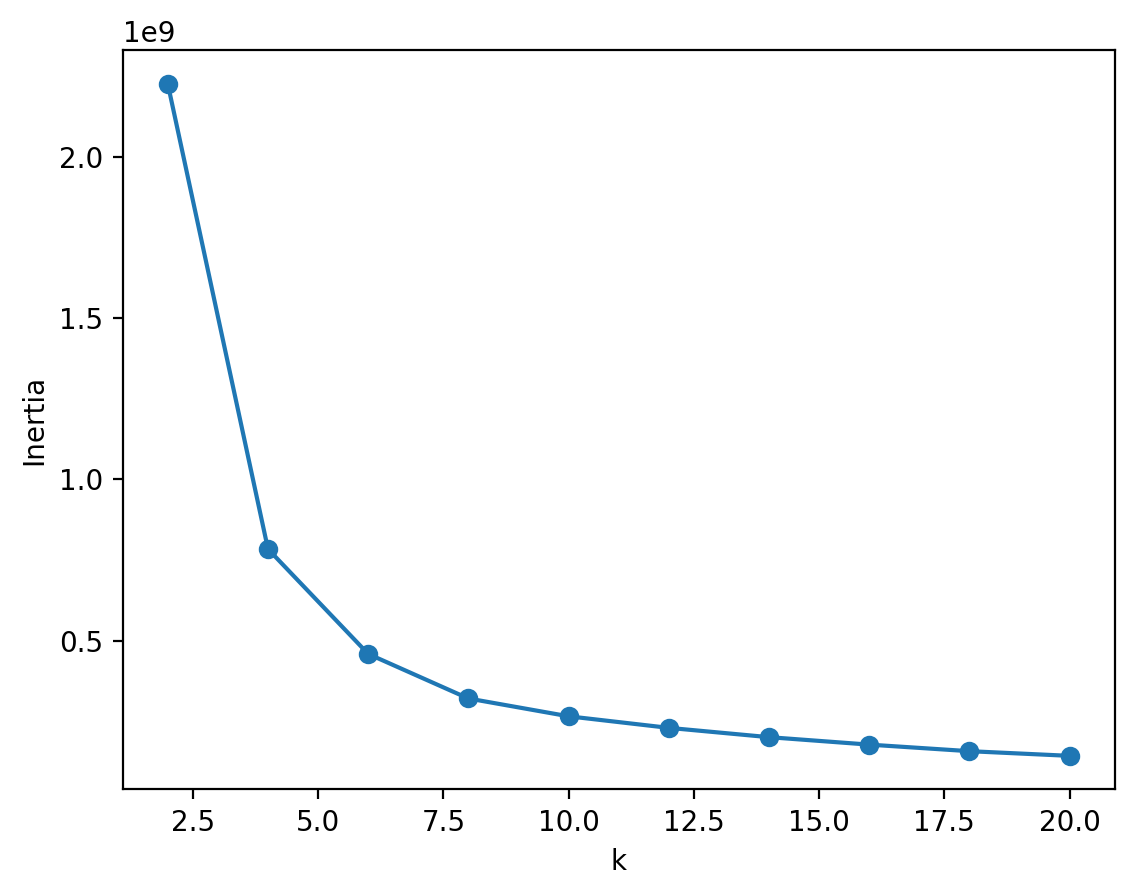

In [44]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

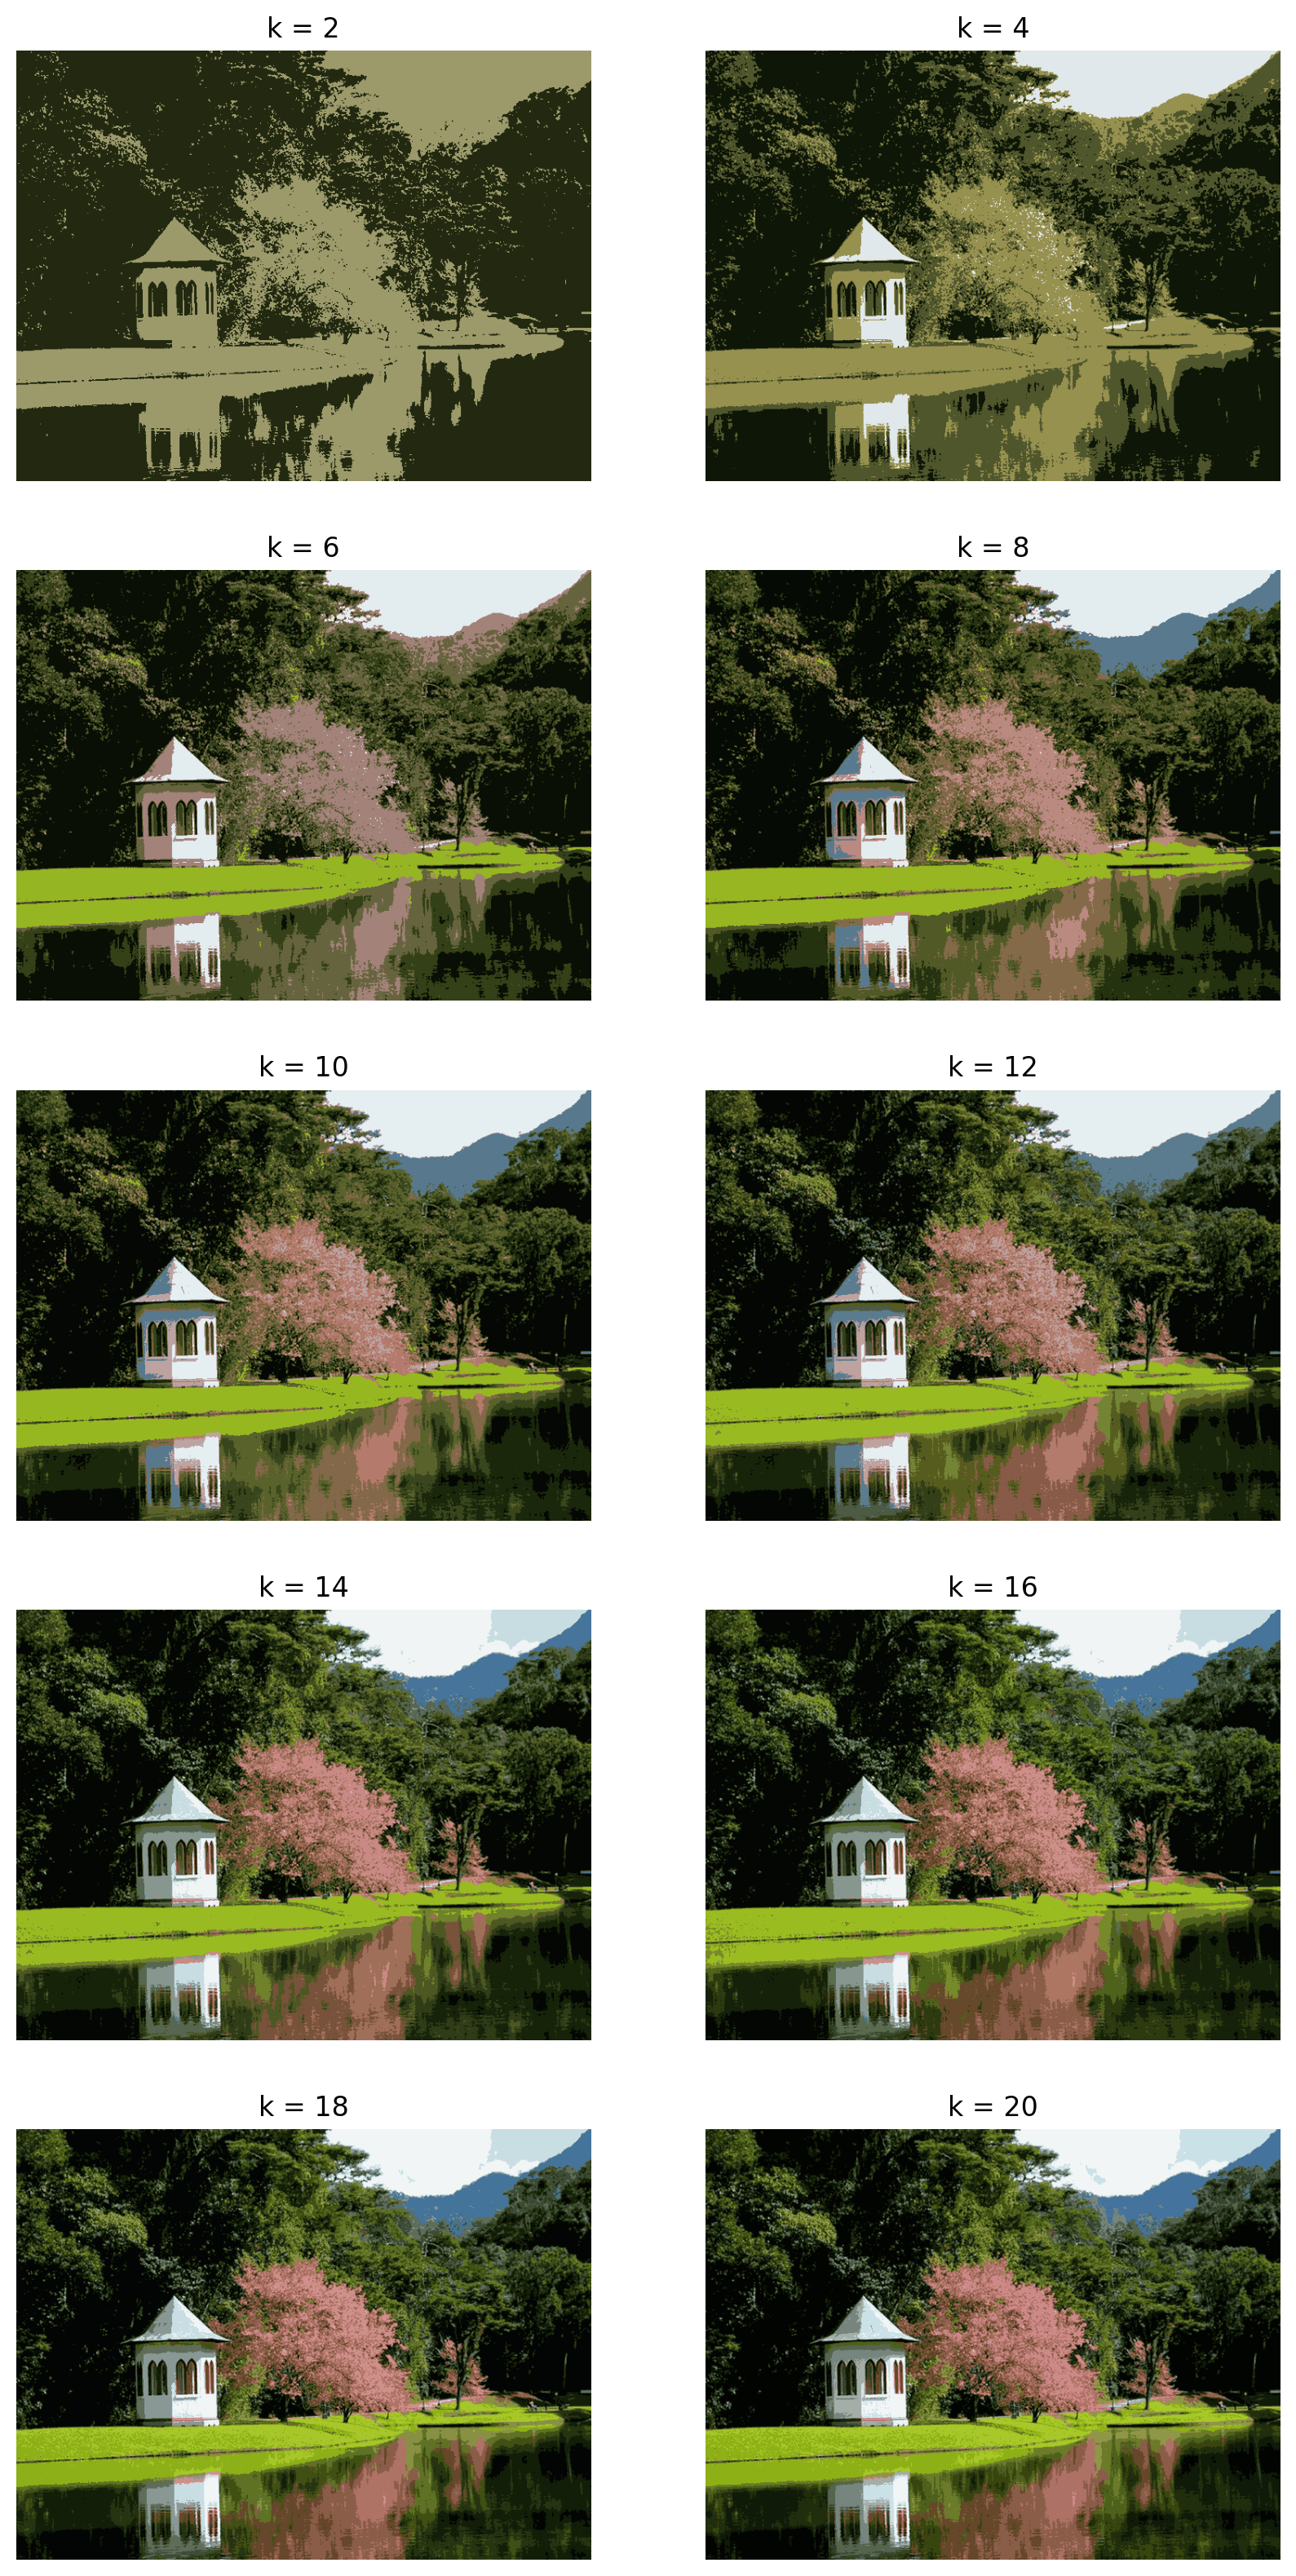

In [45]:
# Visualize results: Compare original image vs. clustered/quantized output.
# Tip: Display multiple ks to see trade-off between detail and compression.
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');